# Stock market behavior: what is normal?

Some ad-hoc data analysis to understand if stock market gains are normal or abnormal.  Is there a real equity premium or is that an illusion?

In [84]:
import quandl
import datetime
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [85]:
%matplotlib inline

#S&P Composite Index

Time series popularized by Robert Shiller in "Irrational Exuberance".

This is not the S&P 500 or related, official indices.  It is spliced together from S&P 500 (which started May 1957) with earlier S&P indices, and earlier stock data by Alfred Cowles going back to 1871 (see http://www.advisorperspectives.com/dshort/updates/Validating-the-SP-Composite.php for further details).    

Another important point of distinction is that it is monthly data.  The S&P 500 data, for example, is a monthly average of daily close prices.  This tends to smooth things out which is good for certain historical analyses but also eliminated the real black swans.

In [7]:
df = quandl.get("YALE/SPCOMP")
df.head()

,S&P Composite,Dividend,Earnings,CPI,Long Interest Rate,Real Price,Real Dividend,Real Earnings,Cyclically Adjusted PE Ratio
Year,,,,,,,,,
1871-01-31,4.44,0.26,0.4,12.464061,5.320000,85.838362,5.026571,7.733186,NaN
1871-02-28,4.50,0.26,0.4,12.844641,5.323333,84.420623,4.877636,7.504055,NaN
1871-03-31,4.61,0.26,0.4,13.034972,5.326667,85.221436,4.806415,7.394485,NaN
1871-04-30,4.74,0.26,0.4,12.559226,5.330000,90.943879,4.988483,7.674589,NaN
1871-05-31,4.86,0.26,0.4,12.273812,5.333333,95.414601,5.104485,7.853054,NaN


In [40]:
sp_comp = df['S&P Composite']
sp_comp_real = df['Real Price']
sp500_adj = sp_comp [datetime.datetime(1957,3,31):]
sp500_real = sp_comp_real [datetime.datetime(1957,3,31):]

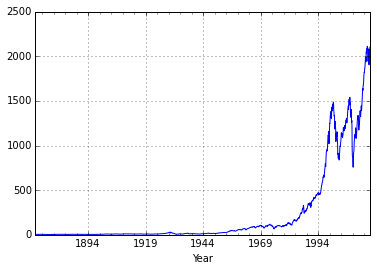

In [11]:
sp_series.plot()

Note the rather meager gains (which can be explained by the growth of the US economy) until the 1980s, when there appears to be an abnormal(?) upsurge.  And of course, note the even more ridiculous upsurge starting in the mid 90s.  Ah, Dot-Com.  Those were heady times.


### Daily S&P 500 data

In [77]:
sp500_daily = quandl.get("YAHOO/INDEX_GSPC")


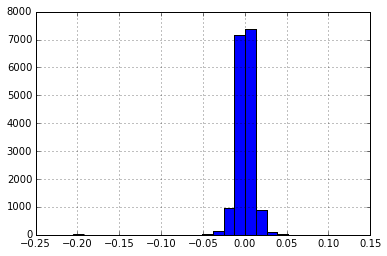

In [68]:
rets = sp500_daily['Close'].pct_change()
rets.hist(bins=25)

In [62]:
five_sigma = rets[ np.abs(( rets - rets.mean()) / rets.std()) > 5 ]

In [63]:
five_sigma

Date
1950-06-26   -0.053814
1955-09-26   -0.066185
1962-05-28   -0.066756
1970-05-27    0.050224
1987-10-16   -0.051597
1987-10-19   -0.204669
1987-10-20    0.053327
1987-10-21    0.090994
1987-10-26   -0.082789
1987-10-29    0.049254
1988-01-08   -0.067683
1989-10-13   -0.061172
1997-10-27   -0.068657
1997-10-28    0.051152
1998-08-31   -0.068014
1998-09-08    0.050899
2000-04-14   -0.058278
2001-01-03    0.050099
2001-09-17   -0.049216
2002-07-24    0.057327
2002-07-29    0.054078
2008-09-29   -0.088068
2008-09-30    0.054175
2008-10-07   -0.057395
2008-10-09   -0.076167
2008-10-13    0.115800
2008-10-15   -0.090350
2008-10-22   -0.061012
2008-10-28    0.107890
2008-11-05   -0.052677
2008-11-06   -0.050264
2008-11-12   -0.051894
2008-11-13    0.069213
2008-11-19   -0.061156
2008-11-20   -0.067123
2008-11-21    0.063248
2008-11-24    0.064723
2008-12-01   -0.089295
2008-12-16    0.051360
2009-01-20   -0.052816
2009-02-10   -0.049121
2009-03-10    0.063663
2009-03-23    0.070758
2011-0

In [71]:
five_sigma.nlargest(10)

Date
2008-10-13    0.115800
2008-10-28    0.107890
1987-10-21    0.090994
2009-03-23    0.070758
2008-11-13    0.069213
2008-11-24    0.064723
2009-03-10    0.063663
2008-11-21    0.063248
2002-07-24    0.057327
2008-09-30    0.054175
Name: Close, dtype: float64

In [72]:
five_sigma.nsmallest(10)

Date
1987-10-19   -0.204669
2008-10-15   -0.090350
2008-12-01   -0.089295
2008-09-29   -0.088068
1987-10-26   -0.082789
2008-10-09   -0.076167
1997-10-27   -0.068657
1998-08-31   -0.068014
1988-01-08   -0.067683
2008-11-20   -0.067123
Name: Close, dtype: float64

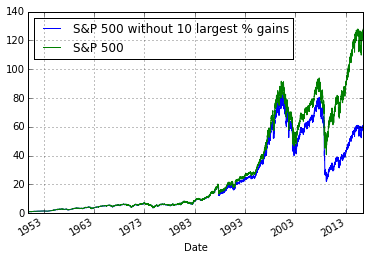

In [83]:
tenth_largest = five_sigma.nlargest(10)[-1]
sp500_drop_largest = (rets [ rets < tenth_largest ] + 1 ).cumprod()
sp500_drop_largest = sp500_drop_largest / sp500_drop_largest.iloc[0]
sp500_drop_largest.name = 'S&P 500 without 10 largest % gains'
ax = sp500_drop_largest.plot(legend=True)
sp500_orig = sp500_daily['Close']
sp500_orig.name = 'S&P 500'
( sp500_orig /sp500_orig.iloc[0] ).plot(ax=ax, legend=True)